In [1]:
# import necessary libraries and functions
import numpy as np
import pandas as pd
import pickle as pkl

from helper_functions import *

## 1. Indentification of knee point

Knee for 6A2L-4.4-50um-6.0-0.1C-20210526-lz (2): 24


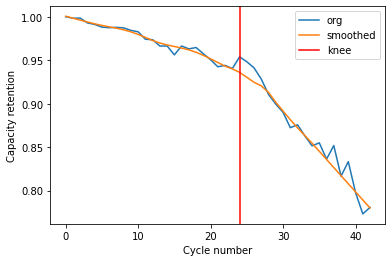

In [3]:
name = "6A2L-4.4-50um-6.0-0.1C-20210526-lz (2)"
knee = get_knee_point(all_charge_df_agg_dict[name])
print("Knee for %s: %d" %(name, knee))

## 2. 1DCNN model training

1/1 [==============================] - 0s 63ms/step


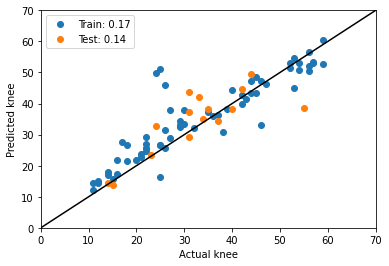

In [6]:
model = CNN1D_train(X_train, y_train, X_test, y_test, 500, 1)

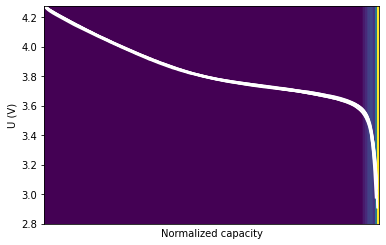

In [35]:
X = scaled_X[all_batteries.index(name)]
discharge_data = all_resampled_ts_dict[name]
plot_saliency(model, X, discharge_data, n_cycle=10)

## 3. Get curve variance 

In [37]:
# Get area_var using different segments
end_perc = 1.0
area_var_df = pd.DataFrame(columns = ["name", "area_var"])
for name in all_batteries:
    area_var = get_area_var(name, end_perc, all_charge_df_dict[name])
    area_var_df.loc[len(area_var_df)] = [name, area_var]

Text(0, 0.5, 'Knee point')

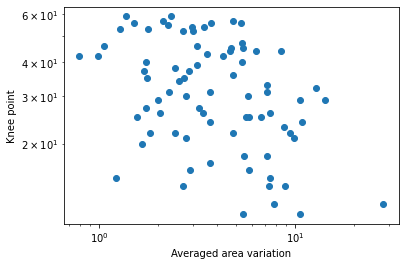

In [42]:
ax = knee_df.merge(area_var_df, on=["name"]).plot(
    "area_var", "knee", marker="o", linewidth=0, legend=False
)
ax.semilogx()
ax.semilogy()
ax.set_xlabel("Averaged area variation")
ax.set_ylabel("Knee point")